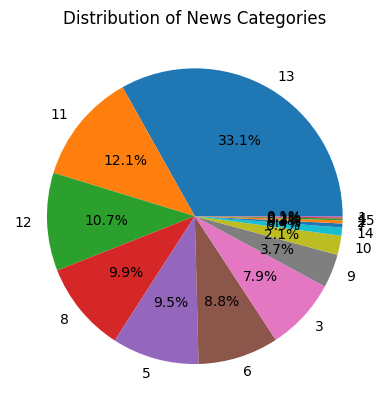

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train.csv")


# Create a dictionary to map categories to IDs
category_to_id = {category: i+1 for i, category in enumerate(df['news_category'].unique())}

# Replace the categories in the DataFrame with their corresponding IDs
df['category_id'] = df['news_category'].map(category_to_id)

# Count the number of occurrences of each category ID
category_counts = df['category_id'].value_counts()

# Create a pie chart of the category counts with ID labels
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Distribution of News Categories")

plt.show()

In [12]:
import dill 

with open("../data/model.pkl", "rb") as f:
    model = dill.load(f)

with open("../data/embeddings.pkl", "rb") as f:
    embeddings = dill.load(f)

In [13]:
model.visualize_topics()

In [14]:
df = pd.read_csv("../data/train.csv")
df=df["news_title"]
docs = docs = [str(i) for i in df.values]

from umap import UMAP

reduced_embeddings = UMAP(n_neighbors=3, n_components=3, min_dist=0.5, metric='cosine').fit_transform(embeddings)



In [15]:
model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)


In [16]:
model.visualize_hierarchy()


In [17]:
model.visualize_barchart()


In [18]:
model.visualize_heatmap()


In [19]:
from indicnlp.tokenize import sentence_tokenize, indic_tokenize


df = pd.read_csv("../data/train.csv")



In [20]:
docs = [str(i) for i in df.values]
timestamps=df["news_date"].values.tolist()

topics_over_time = model.topics_over_time(docs, timestamps, nr_bins=10)

chart=model.visualize_topics_over_time(topics_over_time)

chart.write_html("../data/topics_over_time.html")

chart

10it [00:13,  1.36s/it]
